In [3]:
import pandas as pd
import numpy as np
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [193]:
df = pd.read_csv('SelectRecords_EndTime_subset_800m.csv')

In [194]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,E_Time,TripStartHM,EventEndHM
0,0,397,21:51:17,21:57:54,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,365,Fulton St & Grand Ave,...,Subscriber,1970.0,1,2016-01-01,2016-01-01,NaN,2017-12-05 21:00:00,21:00:00,21.850000,21.0
1,1,218,21:06:04,21:09:42,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,399,Lafayette Ave & St James Pl,...,Subscriber,1986.0,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0
2,2,638,21:06:16,21:16:54,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,3222,Hanson Pl & St Felix St,...,Subscriber,1974.0,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0
3,3,292,21:19:57,21:24:49,397,Fulton St & Clermont Ave,40.684157,-73.969223,421,Clermont Ave & Park Ave,...,Subscriber,1984.0,1,2016-01-03,2016-01-03,NaN,2017-12-05 21:00:00,21:00:00,21.316667,21.0
4,4,621,21:54:07,22:04:28,467,Dean St & 4 Ave,40.683125,-73.978951,3048,Putnam Ave & Nostrand Ave,...,Subscriber,1975.0,1,2016-01-03,2016-01-03,NaN,2017-12-05 21:00:00,21:00:00,21.900000,21.0


In [195]:
df.Event_type.unique()

array([nan, 'basketball', 'boxing', 'concert', 'other', 'hockey', 'family'], dtype=object)

In [196]:
len(df)

5940

In [197]:
df.keys()

Index([u'Unnamed: 0', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'startdate', u'stopdate',
       u'Event_type', u'End_Time', u'E_Time', u'TripStartHM', u'EventEndHM'],
      dtype='object')

In [200]:
len(df)

5940

In [201]:
X = df[['end station latitude','end station longitude']]

In [202]:
dd = pd.DataFrame(X.groupby(['end station latitude','end station longitude']).size())
dd.reset_index(inplace=True)
dd.rename(columns={0:'count'},inplace=True)
dd.head()

,end station latitude,end station longitude,count
0,40.646768,-74.016510,1
1,40.661063,-73.979453,17
2,40.663779,-73.983968,30
3,40.665147,-73.976376,21
4,40.666208,-73.981999,28


In [203]:
dd = dd.sort_values('count')

In [204]:
#Use package from sklearn.
from sklearn.cluster import KMeans

n=5 # number of clusters
#dd=X #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(np.array(dd['count']).reshape(-1,1))
#result.
print(res.labels_)
# print res.predict(dd)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2]


In [205]:
dd['label'] = res.labels_

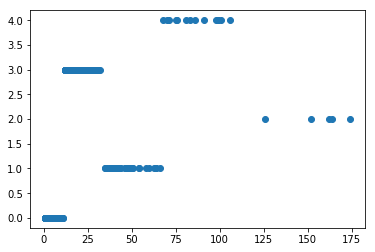

In [206]:
plt.plot(dd['count'],dd['label'],'o')

In [207]:
leg = []
for i in range(5):
    t = dd[dd['label'] == i]
    leg.append([t['count'].min(),t['count'].max()])

In [208]:
leg

[[1, 11], [35, 66], [126, 174], [12, 32], [68, 106]]

In [23]:
import geopandas as gpd

In [24]:
nyc = gpd.read_file('CommunityDistricts/geo_export_2f574bf8-c85e-442d-b2c6-2b06c5956290.shp')
nyc.head()

,shape_leng,shape_area,boro_cd,geometry
0,51549.557886,1.031778e+08,311.0,POLYGON ((-73.97299433938896 40.60881414180224...
1,65821.999543,8.819584e+07,313.0,POLYGON ((-73.98372152615246 40.59582107821707...
2,52245.830489,9.952550e+07,312.0,POLYGON ((-73.97139631688152 40.64825778611409...
3,37008.100406,5.666322e+07,304.0,POLYGON ((-73.89646625062909 40.68233642247531...
4,62239.832144,1.142663e+08,209.0,"POLYGON ((-73.83979488496 40.8356192074919, -7..."


In [30]:
colors = plt.cm.Reds(np.linspace(0, 1, 5))

In [31]:
colors

array([[ 1.        ,  0.96078431,  0.94117647,  1.        ],
       [ 0.98823529,  0.73207228,  0.62992695,  1.        ],
       [ 0.98357555,  0.41279508,  0.28835063,  1.        ],
       [ 0.79257209,  0.0932872 ,  0.11298731,  1.        ],
       [ 0.40392157,  0.        ,  0.05098039,  1.        ]])

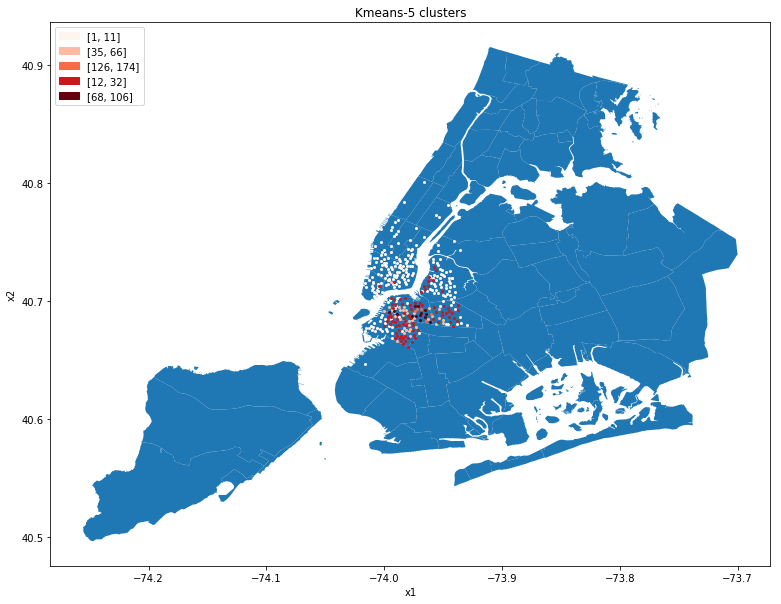

In [42]:

#plt.subplot(1,2,1)

#plt.subplot(1,2,2)
#plt.figure(figsize=(20,10))
ax = nyc.plot(figsize=(20,10))

colors = plt.cm.Reds(np.linspace(0, 1, 5))

for i,c in enumerate(colors):
    plt.scatter(dd[dd['label']==i]['end station longitude'], dd[dd['label']==i]['end station latitude'], 
                c=c, axes=ax,s=4,label=i)
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(-74.1,-73.9)

import matplotlib.patches as mpatches
clum_num=len(dd.loc[:,'label'].unique())

handles=[]
for t in range(clum_num):
    locals()["patch_{}".format(t)] = mpatches.Patch(color=colors[t][0:3] , label=leg[t])
    handles.append(locals()["patch_{}".format(t)])

plt.legend(handles=handles,loc='upper left')
#plt.show()
plt.title("Kmeans-{} clusters".format(n))
#plt.legend()
#plt.savefig('KmeansPlot.png',dpi=700)
plt.show()